In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [71]:
# Global import
!pip install mlrose-hiive

In [72]:
# global imports and global vars
import pandas as pd
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

performanceList = [0] *  5
time_to_train = [0] * 5
time_to_predict = [0] * 5

In [73]:
# Step1: read the files 
data = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
# Step2: preprocessing the data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data["species"] = le.fit_transform(data["species"])

X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# *****qiyu: needed otherwise nn model from mlrose doesn't work, why??????????
# Normalize feature data
scaler = preprocessing.MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = preprocessing.OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

In [75]:
# Step3: find the optimal weights using random search algo  - RHC
nn_model_RHC = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                 algorithm = 'random_hill_climb', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 clip_max = 5, max_attempts = 100, 
                                 restarts=0, random_state = 3, curve=True)

nn_model_RHC.fit(X_train_scaled, y_train_hot)

y_test_pred_RHC = nn_model_RHC.predict(X_test_scaled)
y_test_accuracy_RHC = accuracy_score(y_test_hot, y_test_pred_RHC)
print("y_test_accuracy_RHC: ", y_test_accuracy_RHC)

y_test_accuracy_RHC:  0.4444444444444444


In [76]:
print(nn_model_RHC.fitness_curve )
'''
y = nn_model_RHC.loss[:,0]
x = nn_model_RHC.loss[:,1]
plt.plot(x, y)

'''

[[1.06173826e+00 1.00000000e+00]
 [1.06173826e+00 2.00000000e+00]
 [1.06173826e+00 3.00000000e+00]
 ...
 [1.06057697e+00 1.23700000e+03]
 [1.06057697e+00 1.23800000e+03]
 [1.06057697e+00 1.23900000e+03]]


'\ny = nn_model_RHC.loss[:,0]\nx = nn_model_RHC.loss[:,1]\nplt.plot(x, y)\n\n'

In [77]:
# Step3: find the optimal weights using random search algo - SA
nn_model_SA = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                 algorithm = 'simulated_annealing', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 clip_max = 5, max_attempts = 100, 
                                 restarts=0, random_state = 3, curve=True)

nn_model_SA.fit(X_train_scaled, y_train_hot)

y_test_pred_SA = nn_model_SA.predict(X_test_scaled)
y_test_accuracy_SA = accuracy_score(y_test_hot, y_test_pred_SA)
print("y_test_accuracy_SA: ", y_test_accuracy_SA)

y_test_accuracy_SA:  0.4666666666666667


In [78]:
# Step3: find the optimal weights using random search algo - GA
nn_model_GA = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',
                                 algorithm = 'genetic_alg', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 clip_max = 5, max_attempts = 100, 
                                 restarts=0, random_state = 3, curve=True)

nn_model_GA.fit(X_train_scaled, y_train_hot)

y_test_pred_GA = nn_model_GA.predict(X_test_scaled)
y_test_accuracy_GA = accuracy_score(y_test_hot, y_test_pred_GA)
print("y_test_accuracy_GA: ", y_test_accuracy_GA)

y_test_accuracy_GA:  0.9777777777777777


In [79]:
from sklearn.neural_network import MLPClassifier

MLPClassifier_initial = MLPClassifier(max_iter = 1000)

MLPClassifier_initial.fit(X_train_scaled, y_train_hot)

y_test_pred_MLP = MLPClassifier_initial.predict(X_test_scaled)
y_test_accuracy_MLP = accuracy_score(y_test_hot, y_test_pred_MLP)
print("y_test_accuracy_MLP: ", y_test_accuracy_MLP)

y_test_accuracy_MLP:  0.9777777777777777


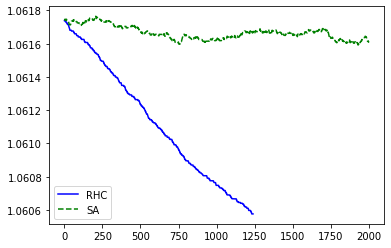

In [80]:
# Step4 compare loss curve & fitness score (try to minimize)

loss_curve_RHC = nn_model_RHC.fitness_curve 
loss_curve_SA = nn_model_SA.fitness_curve 
loss_curve_GA = nn_model_GA.fitness_curve 
loss_curve_MLP = MLPClassifier_initial.loss_curve_

import matplotlib.pyplot as plt

plt.plot(loss_curve_RHC[:,1], loss_curve_RHC[:,0], 'b', label='RHC')
plt.plot(loss_curve_SA[:,1], loss_curve_SA[:,0], 'g', label='SA', linestyle="--")
plt.legend()
plt.savefig("Neural_Network_loss_curve_RHC_SA")
plt.show()

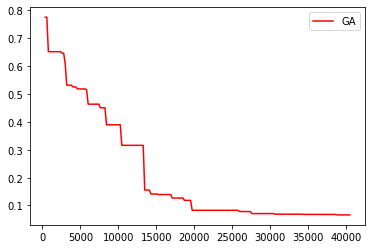

In [88]:
plt.plot(loss_curve_GA[:,1][:200], loss_curve_GA[:,0][:200], 'r', label='GA')
plt.legend()
plt.savefig("Neural_Network_loss_curve_GA_MLP")
plt.show()

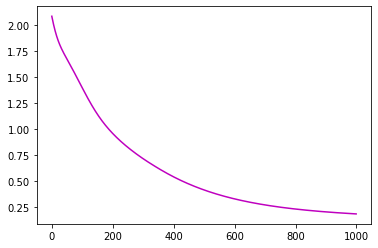

In [87]:
plt.plot(loss_curve_MLP, 'm', label='MLP')

In [82]:
def plotFigure_plot(title, xLabel, xRange, yLabel, xTicks, saveAsName):
    plt.figure()
    plt.plot(xRange, np.mean(train_scores, axis=1), label = "Train Score")
    plt.plot(xRange, np.mean(test_scores, axis=1), label = "CV Score") 
    plt.legend()
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xticks(xTicks)
    plt.grid()
    plt.savefig(saveAsName)
    plt.show()

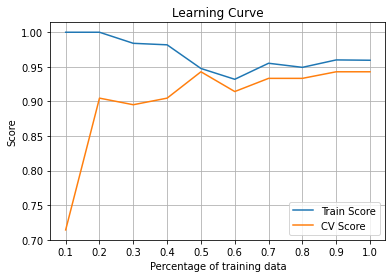

In [83]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, test_scores = learning_curve(
    MLPClassifier_initial, 
    X_train_scaled, 
    y_train_hot, 
    train_sizes = np.linspace(0.1,1.0,10))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_neuralNetworks_learningCurve_MLP.png")

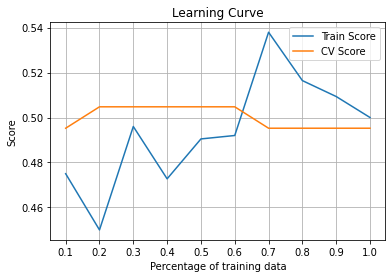

In [84]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, test_scores = learning_curve(
    nn_model_RHC, 
    X_train_scaled, 
    y_train_hot, 
    train_sizes = np.linspace(0.1,1.0,10))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_neuralNetworks_learningCurve_RHC.png")

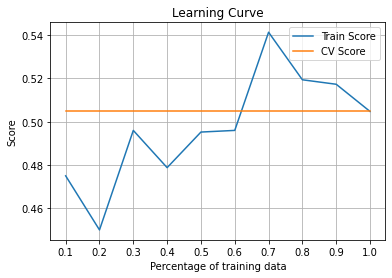

In [85]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, test_scores = learning_curve(
    nn_model_SA, 
    X_train_scaled, 
    y_train_hot, 
    train_sizes = np.linspace(0.1,1.0,10))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1,1.0,10), "Score", np.linspace(0.1,1.0,10), "iris_neuralNetworks_learningCurve_SA.png")

In [91]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, test_scores = learning_curve(
    nn_model_GA, 
    X_train_scaled, 
    y_train_hot, 
    train_sizes = np.linspace(0.1, 1.0, 5))

plotFigure_plot("Learning Curve", "Percentage of training data", np.linspace(0.1, 1.0, 5), "Score", np.linspace(0.1, 1.0, 5), "iris_neuralNetworks_learningCurve_GA.png")

KeyboardInterrupt: 